In [2]:
import sys
sys.path.insert(0,'..')

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from algorithms import create_interp_1d_funcs, create_interp_2d_funcs, sigma_f1d, sigma_f2d
from data_utils import create_1d_data, create_2d_data
%matplotlib notebook


#### Testing a 2 variable function by using create_interp_1d_funcs():

In [11]:
def f(x):
    return np.array([datum[0] + 2* datum[1] for datum in x]).reshape(-1,1)

cut_center = [1,2]
x_train = create_1d_data(x_range=(-5,6,0.5), num_dim=2, cut_center=cut_center)#np.array([
#     [2,2],
#     [1,1],
#     [3,2],
#     [1,0],
#     [0,2],
#     [1,3]
# ])
y = f(x_train)

#-----functions-----
f0 = cut_center[0] + 2*cut_center[1]
f1s = create_interp_1d_funcs(x=x_train, y=y, cut_center=cut_center)

#-----calculation----
x_test = [1.2,0.6]
y_test = x_test[0] + 2 * x_test[1] 
y_estimate = f0 + sigma_f1d(f0, f1s, x_test)

#----result----
print(f'y_true: {y_test}')
print(f'y_estimate: {y_estimate}')

y_true: 2.4
y_estimate: 2.4000000000000004


### Example of a 3 dimentinal data points

In [12]:
def f(x):
    return np.array([datum[0]**2 + datum[1]**2 + datum[2]**2 for datum in x]).reshape(-1,1)

#----creating training data----
cut_center = [0,0,0]
x_1d = create_1d_data(x_range=(-3,4,0.5), num_dim=3, cut_center=cut_center)
x_2d = create_2d_data(x1_range=(-3,4,0.5), x2_range=(-3,4,0.5), num_dim=3, cut_center=cut_center)
y_1d = f(x_1d)
y_2d = f(x_2d)

#----creating the interpolation functions----
f0 = f(np.array([cut_center]))
f_1d = create_interp_1d_funcs(x_1d, y_1d, cut_center)
f_2d = create_interp_2d_funcs(x_2d, y_2d, cut_center)

#----Testing----
test_datum = [3.45, -2.2823, 0.2782]
true_y = f(np.array([test_datum]))
print(f'True y: {true_y}')

#----estimating----
y_estimate = f0 + sigma_f1d(f0, f_1d, test_datum) + sigma_f2d(f0, f_1d, f_2d, test_datum)
print(f'Estimated y: {y_estimate}')

True y: [[17.18878853]]
Estimated y: [[17.18878853]]


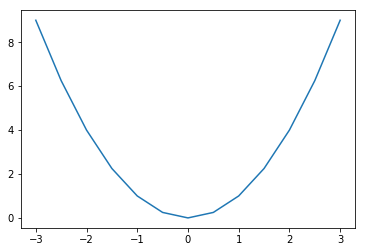

In [29]:
#plotting values (1d)
start = 0
end = 13
fig = plt.figure(1)
plt.plot(x_1d[start:end,0], y_1d[start:end])
plt.show()

In [33]:
x = x_2d[0:200,0]
y = x_2d[0:200,1]
np.meshgrid(x,y)

[array([[-3. , -2.5, -2. , ..., -2.5, -2. , -1.5],
        [-3. , -2.5, -2. , ..., -2.5, -2. , -1.5],
        [-3. , -2.5, -2. , ..., -2.5, -2. , -1.5],
        ...,
        [-3. , -2.5, -2. , ..., -2.5, -2. , -1.5],
        [-3. , -2.5, -2. , ..., -2.5, -2. , -1.5],
        [-3. , -2.5, -2. , ..., -2.5, -2. , -1.5]]),
 array([[-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])]

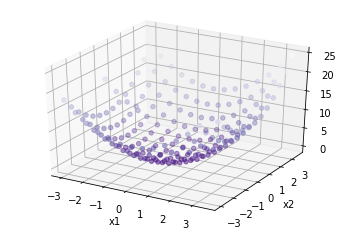

In [30]:
#plotting values (2d)
x1 = x_2d[0:200,0].flatten()
x2 = x_2d[0:200,1].flatten()
z = y_2d[0:200,0].flatten()

fig = plt.figure(2)
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, z, c=-z, cmap='Purples')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()